# Extracting Harmonies from Leadsheets

Say you have one or a lot of leadsheets in musicXML format such as [Effendi's Realbook collection](https://effendi.me/jazz/repo/)

In [1]:
from music21 import chord, key, stream, converter, harmony
from pprint import pprint
import json

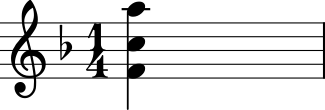

In [2]:
f = chord.Chord('F4 C5 A5')
kf = key.Key('F')
sf = stream.Measure([kf, f])
sf.show()

## Loading a Song
Assuming you have already downloaded Effendi's Whole collection to your local machine you can use music21 to open them and get a lot of information out.

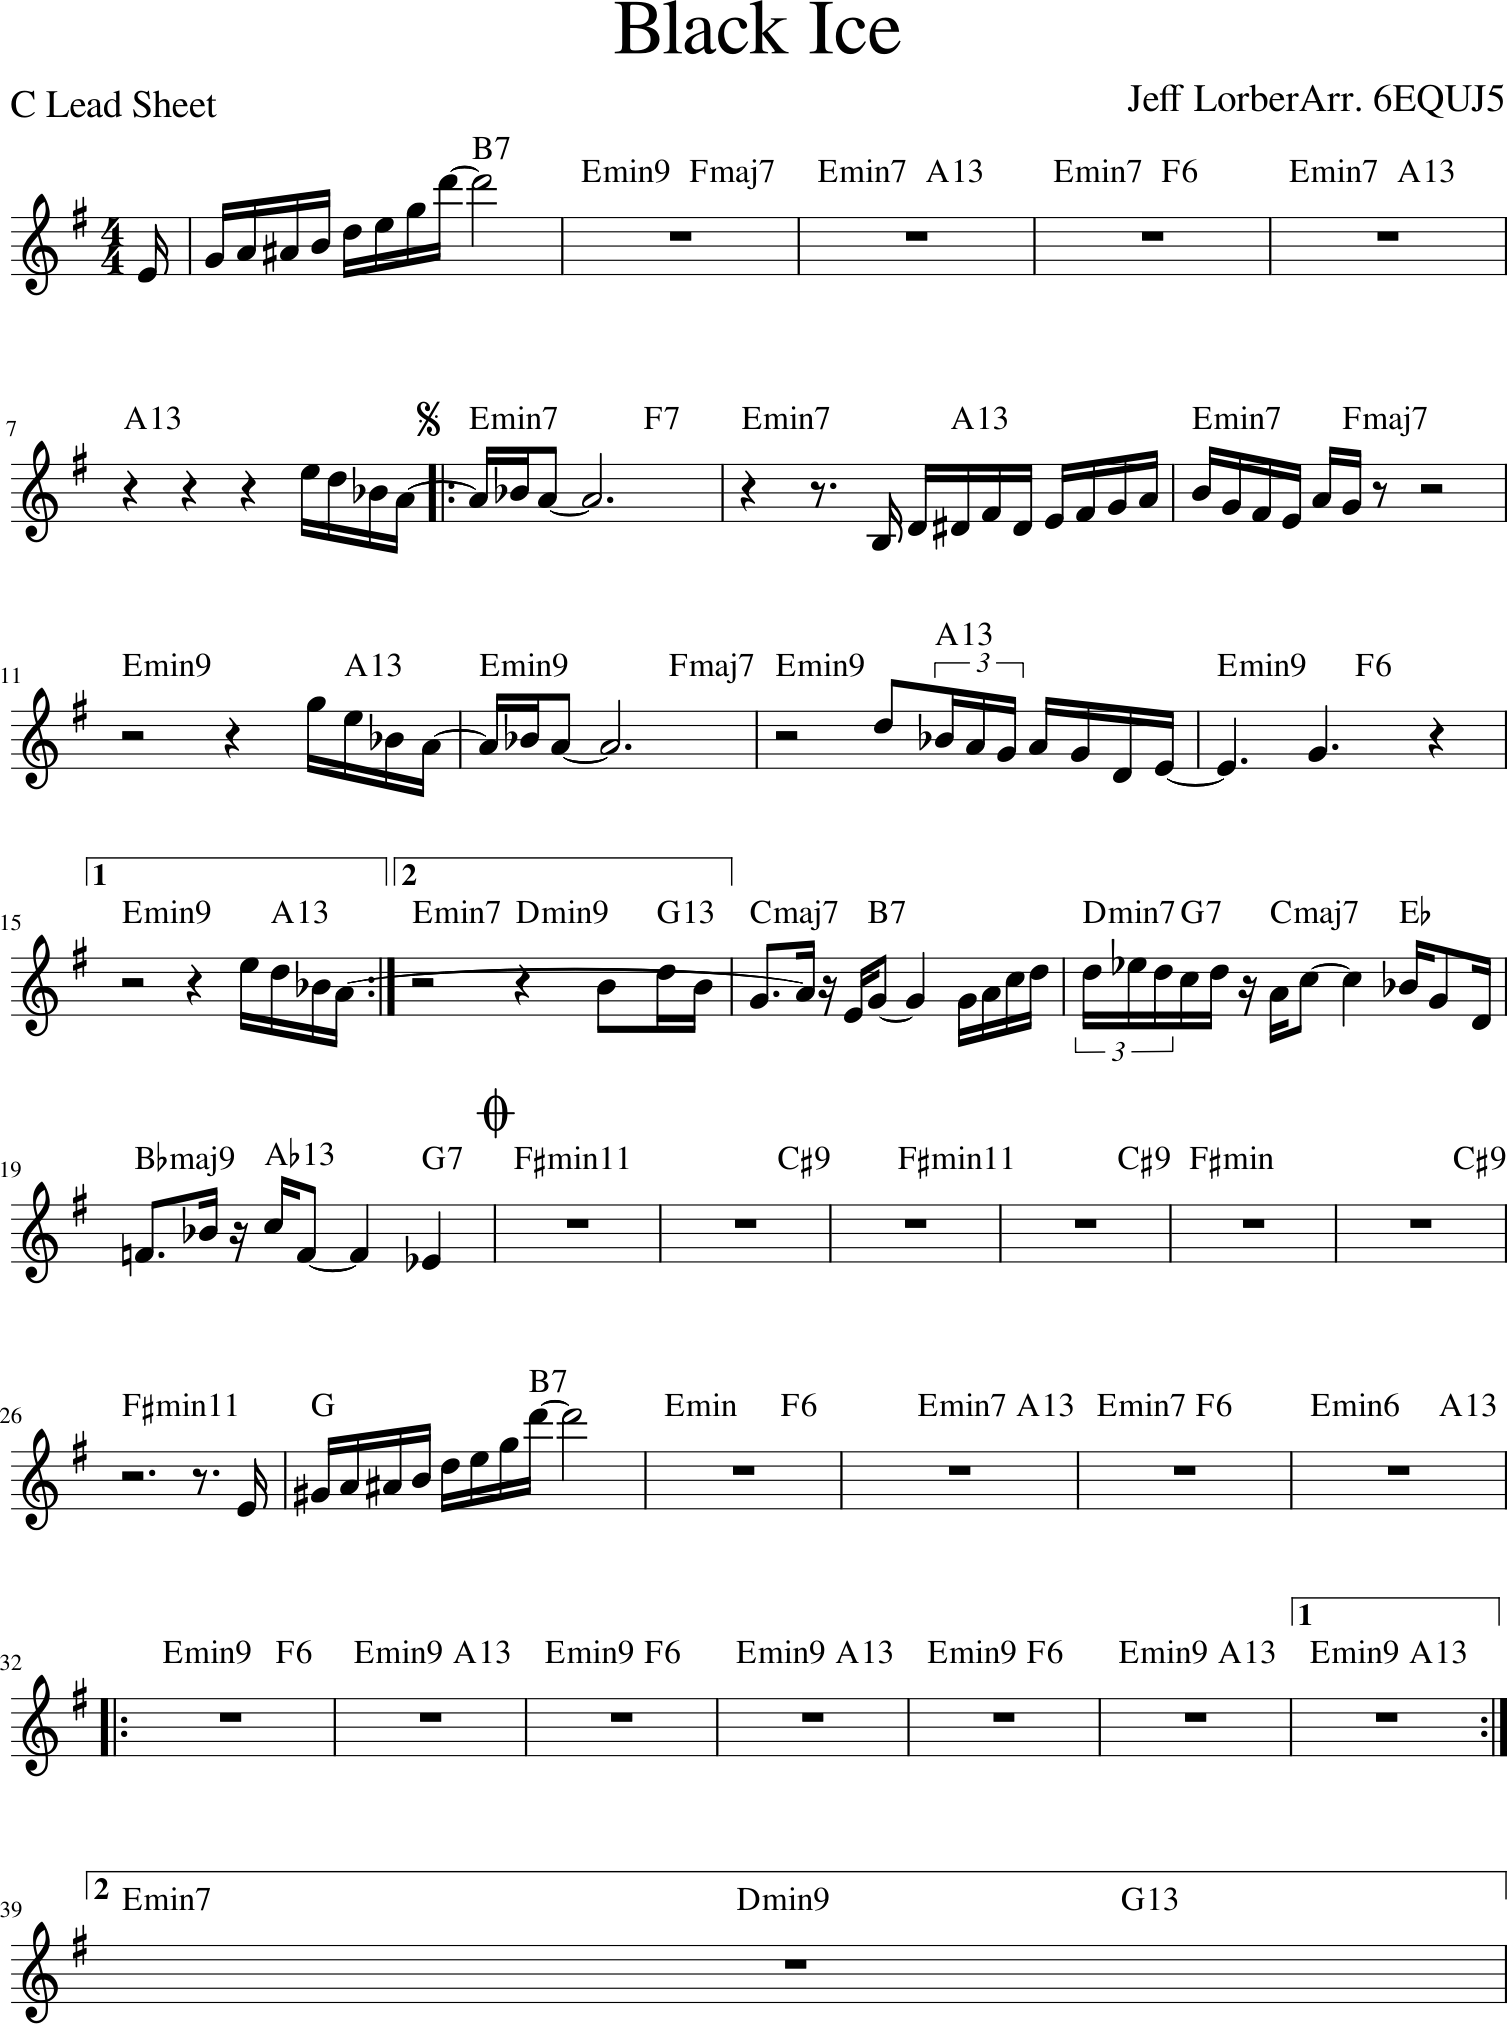

In [3]:
bm = converter.parse('/home/fccoelho/Downloads/effendi.me/jazz/repo/II/Black Ice.xml')
bm.show()

In [4]:
bm.analyze('key')

<music21.key.Key of d minor>

In [5]:
bm.metadata.all()

[('composer', 'Jeff Lorber\nArr. 6EQUJ5'),
 ('copyright', '©2016 Finmusic/effendi.me 5/21/2016'),
 ('movementName', 'Black Ice')]

In [6]:
bm.metadata.title

'Black Ice'

In [7]:
bm.metadata.composer

'Jeff Lorber\nArr. 6EQUJ5'

/home/fccoelho/Documentos/Projects_software/musicir/.venv/lib/python3.10/site-packages/music21/musicxml/m21ToXml.py:477: MusicXMLWarning: <music21.stream.Score 0x7f629d7409a0> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


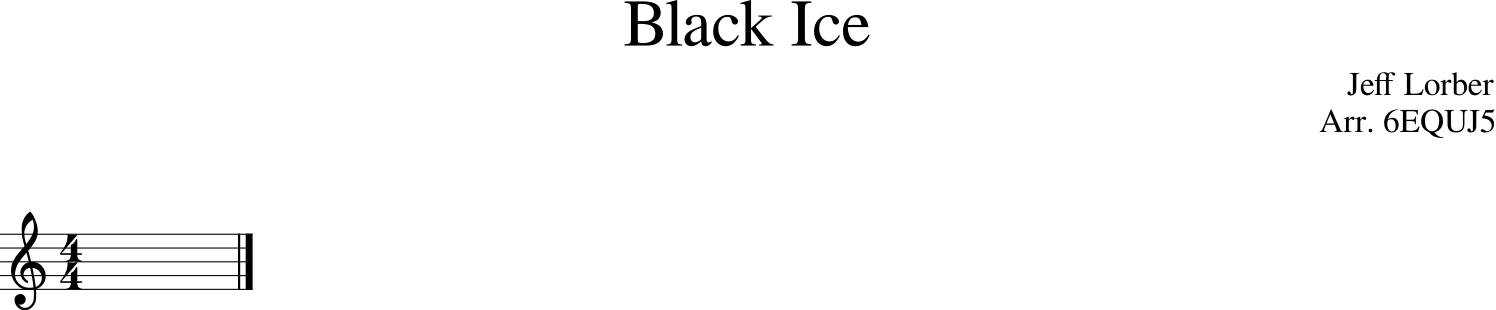

In [8]:
bm.getTimeSignatures().show()

In [9]:
m = bm.measure(1)

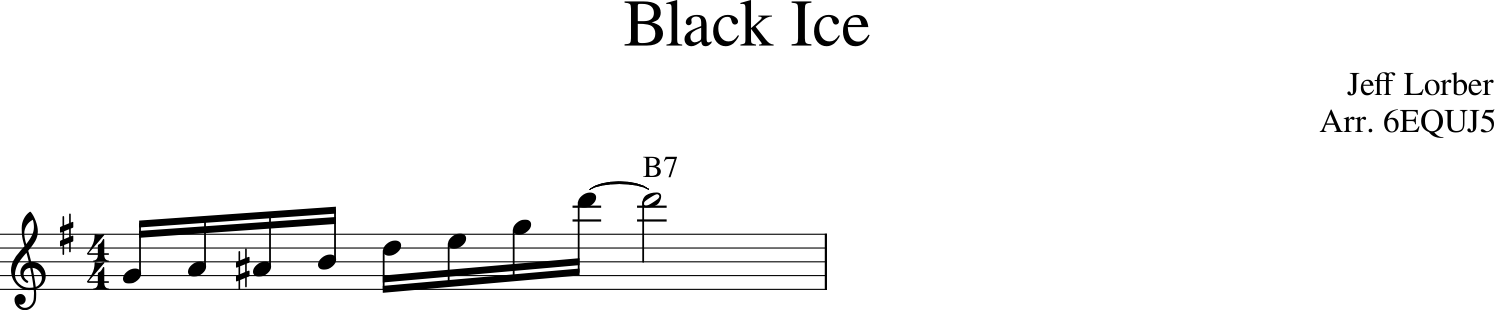

In [10]:
m.show()

However, if you want to extract the harmony, i.e. the sequence of chords, measure by measure. Music21 does not help much. That's when you will resort to MusicIR SongParser.

In [11]:
from musicir.leadsheets.musicxml import ChordParser, SongParser, import_into_db

In [12]:
SP = SongParser("/home/fccoelho/Downloads/effendi.me/jazz/repo/II/Black Ice.xml")
SP.number_of_measures

62

In [13]:
c= SP.get_measure_chords(1)[0]

In [14]:
Ch = ChordParser(c)
Ch

B - 

In [15]:
pprint(json.loads(SP.chords_as_json()))

[{'chords': [], 'measure': 0},
 {'chords': ['B - '], 'measure': 1},
 {'chords': ['E - ', 'F - '], 'measure': 2},
 {'chords': ['E - ', 'A - '], 'measure': 3},
 {'chords': ['E - ', 'F - '], 'measure': 4},
 {'chords': ['E - ', 'A - '], 'measure': 5},
 {'chords': ['A - '], 'measure': 6},
 {'chords': ['E - ', 'F - '], 'measure': 7},
 {'chords': ['E - ', 'A - '], 'measure': 8},
 {'chords': ['E - ', 'F - '], 'measure': 9},
 {'chords': ['E - ', 'A - '], 'measure': 10},
 {'chords': ['E - ', 'F - '], 'measure': 11},
 {'chords': ['E - ', 'A - '], 'measure': 12},
 {'chords': ['E - ', 'F - '], 'measure': 13},
 {'chords': ['E - ', 'A - '], 'measure': 14},
 {'chords': ['E - ', 'D - ', 'G - '], 'measure': 15},
 {'chords': ['C - ', 'B - '], 'measure': 16},
 {'chords': ['D - ', 'G - ', 'C - ', 'E♭ - '], 'measure': 17},
 {'chords': ['B♭ - ', 'A♭ - ', 'G - '], 'measure': 18},
 {'chords': ['F♯ - '], 'measure': 19},
 {'chords': ['C♯ - '], 'measure': 20},
 {'chords': ['F♯ - '], 'measure': 21},
 {'chords': ['

In [24]:
for m in range(SP.number_of_measures):
    h = SP.get_measure_chords(m)
    if h:
        print(f"Measure {m}: ", end='')
    for i, c in enumerate(h):
        if i < len(h) - 1:
            print(ChordParser(c), end=', ')
        else:
            print(f" {ChordParser(c)}")


Measure 1:  B - 
Measure 2: E - ,  F - 
Measure 3: E - ,  A - 
Measure 4: E - ,  F - 
Measure 5: E - ,  A - 
Measure 6:  A - 
Measure 7: E - ,  F - 
Measure 8: E - ,  A - 
Measure 9: E - ,  F - 
Measure 10: E - ,  A - 
Measure 11: E - ,  F - 
Measure 12: E - ,  A - 
Measure 13: E - ,  F - 
Measure 14: E - ,  A - 
Measure 15: E - , D - ,  G - 
Measure 16: C - ,  B - 
Measure 17: D - , G - , C - ,  E♭ - 
Measure 18: B♭ - , A♭ - ,  G - 
Measure 19:  F♯ - 
Measure 20:  C♯ - 
Measure 21:  F♯ - 
Measure 22:  C♯ - 
Measure 23:  F♯ - 
Measure 24:  C♯ - 
Measure 25:  F♯ - 
Measure 26: G - ,  B - 
Measure 27: E - ,  F - 
Measure 28: E - ,  A - 
Measure 29: E - ,  F - 
Measure 30: E - ,  A - 
Measure 31: E - ,  F - 
Measure 32: E - ,  A - 
Measure 33: E - ,  F - 
Measure 34: E - ,  A - 
Measure 35: E - ,  F - 
Measure 36: E - ,  A - 
Measure 37: E - ,  A - 
Measure 38: E - , D - ,  G - 
Measure 39: C - ,  B - 
Measure 40: D - , G - , C - ,  E♭ - 
Measure 41: B♭ - , A♭ - ,  G - 
Measure 42:  F♯ - 

In [25]:
SP.get_measure_melody(2)[0]

<Element 'note' at 0x7f629aff0450>


In [21]:
SP.melody_as_json()

'[{"measure": 0, "notes": ["E"]}, {"measure": 1, "notes": ["G", "A", "A\\u266f", "B", "D", "E", "G", "D", "D"]}, {"measure": 2, "notes": ["Rest whole"]}, {"measure": 3, "notes": ["Rest whole"]}, {"measure": 4, "notes": ["Rest whole"]}, {"measure": 5, "notes": ["Rest whole"]}, {"measure": 6, "notes": ["Rest quarter", "Rest quarter", "Rest quarter", "E", "D", "B\\u266d", "A"]}, {"measure": 7, "notes": ["A", "B\\u266d", "A", "A"]}, {"measure": 8, "notes": ["Rest quarter", "Rest eighth", "B", "D", "D\\u266f", "F", "D", "E", "F", "G", "A"]}, {"measure": 9, "notes": ["B", "G", "F", "E", "A", "G", "Rest eighth", "Rest half"]}, {"measure": 10, "notes": ["Rest half", "Rest quarter", "G", "E", "B\\u266d", "A"]}, {"measure": 11, "notes": ["A", "B\\u266d", "A", "A"]}, {"measure": 12, "notes": ["Rest half", "D", "B\\u266d", "A", "G", "A", "G", "D", "E"]}, {"measure": 13, "notes": ["E", "G", "Rest quarter"]}, {"measure": 14, "notes": ["Rest half", "Rest quarter", "E", "D", "B\\u266d", "A"]}, {"measu

In [ ]:
Suppose you want to store the analyzed songs into a database for further analysys 

In [32]:
from glob import glob

In [33]:
songs = glob('/home/fccoelho/Downloads/effendi.me/jazz/repo/*.xml', recursive=True)

In [22]:
import_into_db('/home/fccoelho/Downloads/effendi.me/jazz/repo/')